In [1]:
import visa

In [52]:
rm = visa.ResourceManager("/Library/Frameworks/Visa.framework/VISA")
print rm.list_resources()
my_instrument = rm.open_resource('GPIB0::26::INSTR')
print(my_instrument.query("*IDN?"))

(u'GPIB0::8::INSTR', u'GPIB0::9::INSTR', u'GPIB0::26::INSTR')
Keithley Instruments Inc., Model 2602, 1083453, 1.4.2



In [53]:
inpt = my_instrument.write('smua.reset()')
inpt = my_instrument.write('smua.measure.nplc = 10')
inpt = my_instrument.write('smua.source.limiti = 0.1') #current limit
inpt = my_instrument.write('SweepVLinMeasureI(smua, 1, -1, .01, 10)') #sweep. 

In [59]:
output = my_instrument.query('printbuffer(1, 10, smua.nvbuffer1.readings)')
print output

5.40972e-11, -5.79655e-10, -4.64988e-10, -7.76887e-10, -5.45156e-10, -4.91893e-10, -8.04567e-10, -5.02336e-10, -5.48422e-10, -7.61473e-10



In [34]:
import numpy as np
current = np.array(map(float, output.split(', ')))
print current

[  1.62733000e-10   1.19686000e-11  -7.21216000e-11  -1.80304000e-10
  -3.60441000e-10  -3.54993000e-10  -3.76749000e-10  -5.31375000e-10
  -4.18460000e-10  -4.61710000e-10  -5.39863000e-10  -4.24969000e-10
  -5.15199000e-10  -4.96733000e-10  -4.18830000e-10  -5.48697000e-10
  -4.52650000e-10  -4.06456000e-10  -5.59557000e-10  -4.48191000e-10
  -4.11284000e-10  -5.75209000e-10  -4.38106000e-10  -4.56977000e-10
  -5.39863000e-10  -4.27604000e-10  -5.04374000e-10  -4.99809000e-10
  -4.24135000e-10  -5.50282000e-10  -4.70078000e-10  -4.07052000e-10
  -5.65672000e-10  -4.48525000e-10  -4.15206000e-10  -5.61190000e-10
  -4.32968000e-10  -4.45712000e-10  -5.55921000e-10  -4.34947000e-10
  -4.85814000e-10  -5.21004000e-10  -4.29106000e-10  -5.41365000e-10
  -4.87030000e-10  -4.17268000e-10  -5.70107000e-10  -4.53091000e-10
  -4.20046000e-10  -5.71954000e-10  -4.38809000e-10  -4.23729000e-10
  -5.54478000e-10  -4.40371000e-10  -4.77159000e-10  -5.56004000e-10
  -4.33040000e-10  -5.34332000e-10

In [62]:
a = 'a'
b = 'b'
txt = 'thisis %s, %s' \
        %(a, b)
print txt

thisis a, b


In [7]:
import gpib

Keithley Instruments Inc., Model 2602, 1083453, 1.4.2

2602 confirmed


In [35]:
reload(gpib)
KE2602 = gpib.KE2602()
path = '/Users/nakayamahidenori/my_python_modules/'
%matplotlib inline
df = KE2602.meas_iv(path, "test", -1, 1, 11, 0.0438)

Keithley Instruments Inc., Model 2602, 1083453, 1.4.2

2602 confirmed
[ 1.   0.8  0.6  0.4  0.2  0.  -0.2 -0.4 -0.6 -0.8 -1. ] [ -3.38141553e-06   3.54525114e-06   4.06753425e-06   4.33616438e-06
   4.31929224e-06   4.60643836e-06   4.64454338e-06   4.57458904e-06
   4.59826484e-06   4.51579909e-06   4.28200913e-06]


TypeError: expected non-empty vector for x

Keithley Instruments Inc., Model 2602, 1083453, 1.4.2

2602 confirmed


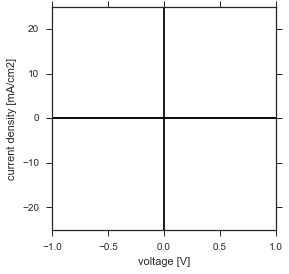

In [30]:
reload(gpib)
KE2602 = gpib.KE2602()
df = KE2602.meas_iv(path, "test", 1, -1, 11, 0.0438, reverse=False)

In [6]:
a, b = [1,2,3]

Exception pyvisa.errors.VisaIOError: VisaIOError('VI_ERROR_CLOSING_FAILED (-1073807338): The VISA driver failed to properly close the session or object reference. This might be due to an error freeing internal or OS resources, a failed network connection, or a lower-level driver or OS error.',) in <object repr() failed> ignored


ValueError: too many values to unpack